# **Sign Language Real-Time Video Detection Project**

***************************************
**Team ID**: C241-PS342

**ML Team**:

  1. Fira Areta Apsarini (M004D4KX2469)
  2. Nadhira Apta Maheswari (M004D4KX1449)
  3. Keysa Anadea Aqiva Ajie (M004D4KX2378)

## **Dataset**

This project utilizes a combined dataset to develop a comprehensive model for recognizing BISINDO sign language alphabets. The dataset consist  of BISINDO sign language alphabet photos that comprises from two main sources: self-collected photos by each Machine Learning team member, and we integrated our self-collected data with a dataset from Kaggle, available at https://www.kaggle.com/datasets/achmadnoer/alfabet-bisindo

In [ ]:
# Install necessary libraries
!pip install gdown opencv-python imgaug

# Import libraries
import gdown
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
import os

In [ ]:
# Download the zip file from Google Drive
gdown.download('https://drive.google.com/uc?id=145OaCR6iOhM0xKwllINXb_NS2tplIq-1', '/content/data.zip', quiet=False)

# Extract the zip file
local_zip = '/content/data.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/content')

# List the files in the extracted folder
extracted_folder = '/content/CollectedData_all/'  # Adjust this to your actual folder
image_files = [os.path.join(extracted_folder, f) for f in os.listdir(extracted_folder) if f.lower().endswith(('.jpg', '.png'))]

# Ensure we have the expected number of images
print(f"Total original images found: {len(image_files)}")

# If not the expected number, print out the files for debugging
if len(image_files) != 777:
    print("The number of original images is not 777. Please check the directory and file extensions.")
    print("List of found images:")
    for f in image_files:
        print(f)

Downloading...
From (original): https://drive.google.com/uc?id=145OaCR6iOhM0xKwllINXb_NS2tplIq-1
From (redirected): https://drive.google.com/uc?id=145OaCR6iOhM0xKwllINXb_NS2tplIq-1&confirm=t&uuid=34aa2d7d-2049-4e3c-917b-d47d96c14fb1
To: /content/data.zip
100%|██████████| 322M/322M [00:01<00:00, 196MB/s]


Total original images found: 777


In [ ]:
# Define augmentation sequence
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flips
    iaa.Crop(percent=(0, 0.1)),  # Random crops
    iaa.LinearContrast((0.75, 1.5)),  # Contrast adjustment
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Gaussian noise
    iaa.Multiply((0.8, 1.2)),  # Brightness adjustment
    iaa.Affine(
        rotate=(-20, 20),  # Rotation
        scale=(0.8, 1.2)  # Scaling
    )
])

In [ ]:
# Create a directory to save augmented images
augmented_dir = '/content/augmented_images'
os.makedirs(augmented_dir, exist_ok=True)

In [ ]:
# Function to augment and save images
def augment_and_save(image_path, save_dir, seq, num_augmented=5):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply augmentations
    augmented_images = [seq(image=image) for _ in range(num_augmented)]

    # Save augmented images
    base_name = os.path.basename(image_path).split('.')[0]
    for i, img in enumerate(augmented_images):
        save_path = os.path.join(save_dir, f'{base_name}_augmented_{i}.jpg')
        cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
# Apply augmentation to all images in the folder
for image_file in image_files:
    augment_and_save(image_file, augmented_dir, seq)

In [ ]:
expected_num_augmented_images = len(image_files) * 5  # Assuming num_augmented is 5
augmented_files = [os.path.join(augmented_dir, f) for f in os.listdir(augmented_dir) if f.endswith('.jpg')]
print(f"Total augmented images: {len(augmented_files)}")
assert len(augmented_files) == expected_num_augmented_images, "Not all images were augmented correctly"

Total augmented images: 3885


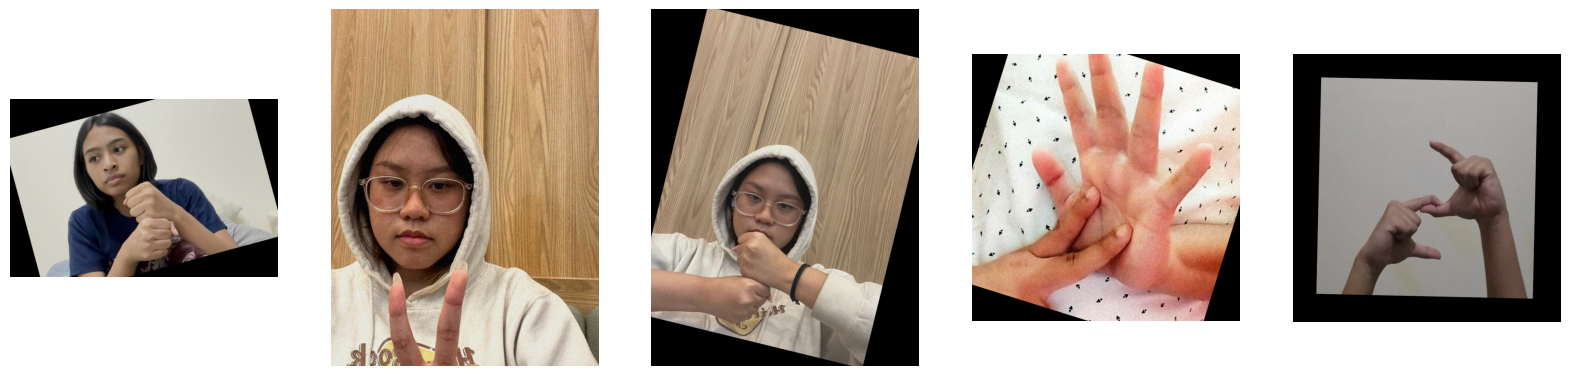

In [ ]:
# Display a few augmented images as a check
augmented_files = [os.path.join(augmented_dir, f) for f in os.listdir(augmented_dir) if f.endswith('.jpg')]
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for img_path, ax in zip(augmented_files[:5], axes):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
#from google.colab import files
#import shutil

In [ ]:
# Create a zip file of the augmented images
#shutil.make_archive('/content/augmented_images', 'zip', augmented_dir)

# Download the zip file
#files.download('/content/augmented_images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import os

#Import the augmented images to google drive
augmented_dir = '/content/augmented_images'
shutil.make_archive('/content/augmented_images', 'zip', augmented_dir)
drive_path = '/content/drive/MyDrive/augmented_images.zip'
shutil.move('/content/augmented_images.zip', drive_path)

'/content/drive/MyDrive/augmented_images.zip'